There are several ways to transform nonstationary time-series data:

▪ Remove trend (constant mean)

▪ Remove heteroscedasticity with log or Box-Cox Transformation (constant variance)

▪ Remove autocorrelation with differencing (exploit constant structure)

▪ Remove seasonality (no periodic component)

▪ Oftentimes you’ll have to do several of these on one dataset!

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


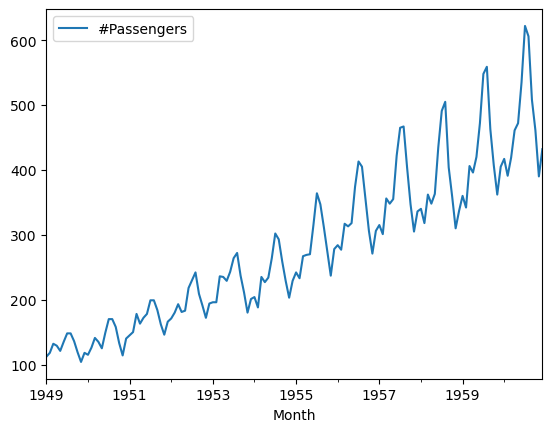

In [15]:
# Load time series data
df = pd.read_csv('AirPassengers.csv', index_col='Month', parse_dates=True)
df.plot();

## Non-stationary data with trend and seasonal components

Remove Seasonality by applying Differencing 
(can be 1st difference if not enough then 2nd then 3rd and so on)

For a monthly (k=12)seasonality (lag-k) then:

* First difference = 𝑌𝑡 − 𝑌𝑡−𝑘 = 𝑌𝑡 − 𝑌𝑡−12

* Second difference = 𝑌𝑡 − 𝑌𝑡−12 − 𝑌𝑡−12 − 𝑌𝑡−24

Remove Trend by applying Differencing 
(can be 1st difference if not enough then 2nd then 3rd and so on)

* First difference = 𝑌𝑡 − 𝑌𝑡−1
* Second difference = 𝑌𝑡 − 𝑌𝑡−1 − 𝑌𝑡−1 − 𝑌𝑡−2

• When both seasonal and first differences are applied, it makes no difference which is done first—the result will be the same.

• However, if the data have a strong seasonal pattern, we recommend that seasonal differencing be done first, because the resulting series will 
sometimes be stationary and there will be no need for a further first difference. 

• If first differencing is done first, there will still be seasonality present.

• It is important that if differencing is used, the differences are interpretable. First differences are the change between one observation and the next.

• Linear trends are removed by first differences, while non-linear trends usually requires second or third or maybe more differences.

• Seasonal differences are the change between one year to the next. Other lags are unlikely to make much interpretable sense and should be 
avoided.

•Linear trends can be summarized by a linear model, and nonlinear trends may be best summarized using a polynomial or other curve-fitting method.

•This approach can help to identify whether a trend is present. Even fitting a linear model to a trend that is clearly super-linear or exponential can be helpful.

•In addition to being used as a trend identification tool, these fit models can also be used to detrend a time series. 

•For example, a linear model can be fit on the time index to predict the observation. 𝑣𝑎𝑙𝑢𝑒 𝑡 = 𝑜𝑏𝑠 𝑡 − 𝑝𝑟𝑒𝑑(𝑡)

• Both approaches removed 
the linear trend. 
• Try to compare them in non-linear trends.

• Recall that differences 
always make you lose 
information, while 
polynomial or other curve 
fitting method can 
sometimes fail to perfectly fit 
the non-linear trend in data
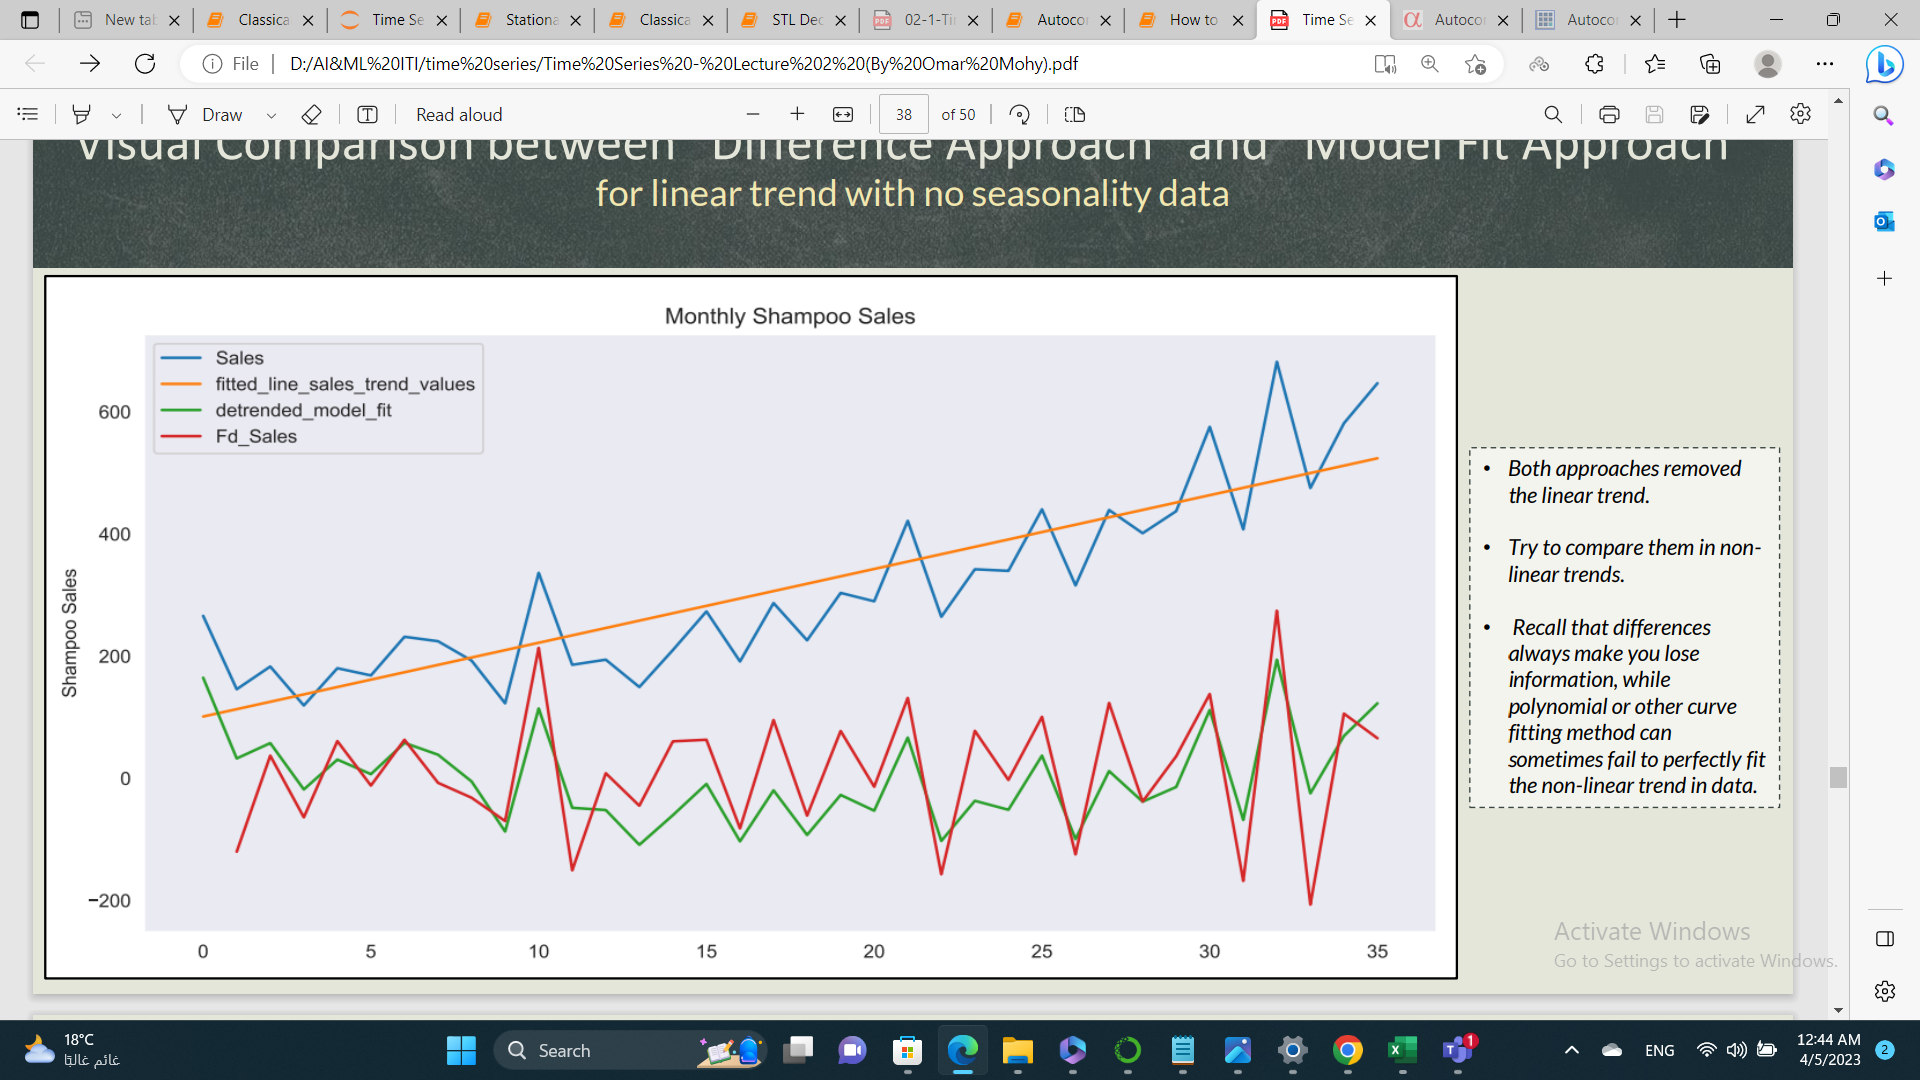

• The seasonal component in a given time series can be a sine wave over a generally fixed period and amplitude.

• This can be approximated easily using a curve-fitting method. A dataset can be constructed with the time index of the sine wave as an input, or x-axis, and the 
observation as the output, or y-axis.

• Once fit, the model can then be used to calculate a seasonal component for any time index.

• The curve can then be used as a new input for modeling with supervised learning algorithms or subtracted from observations to create a seasonally adjusted 
series.

• We can see here that polynomial regression failed to fit a multiplicative seasonal data and thus failed to remove seasonality.

• While first difference has worked fine at the expense of losing information.

• We can conclude that model fit approach are more suitable to remove additive or fixed seasonality than multiplicative seasonality
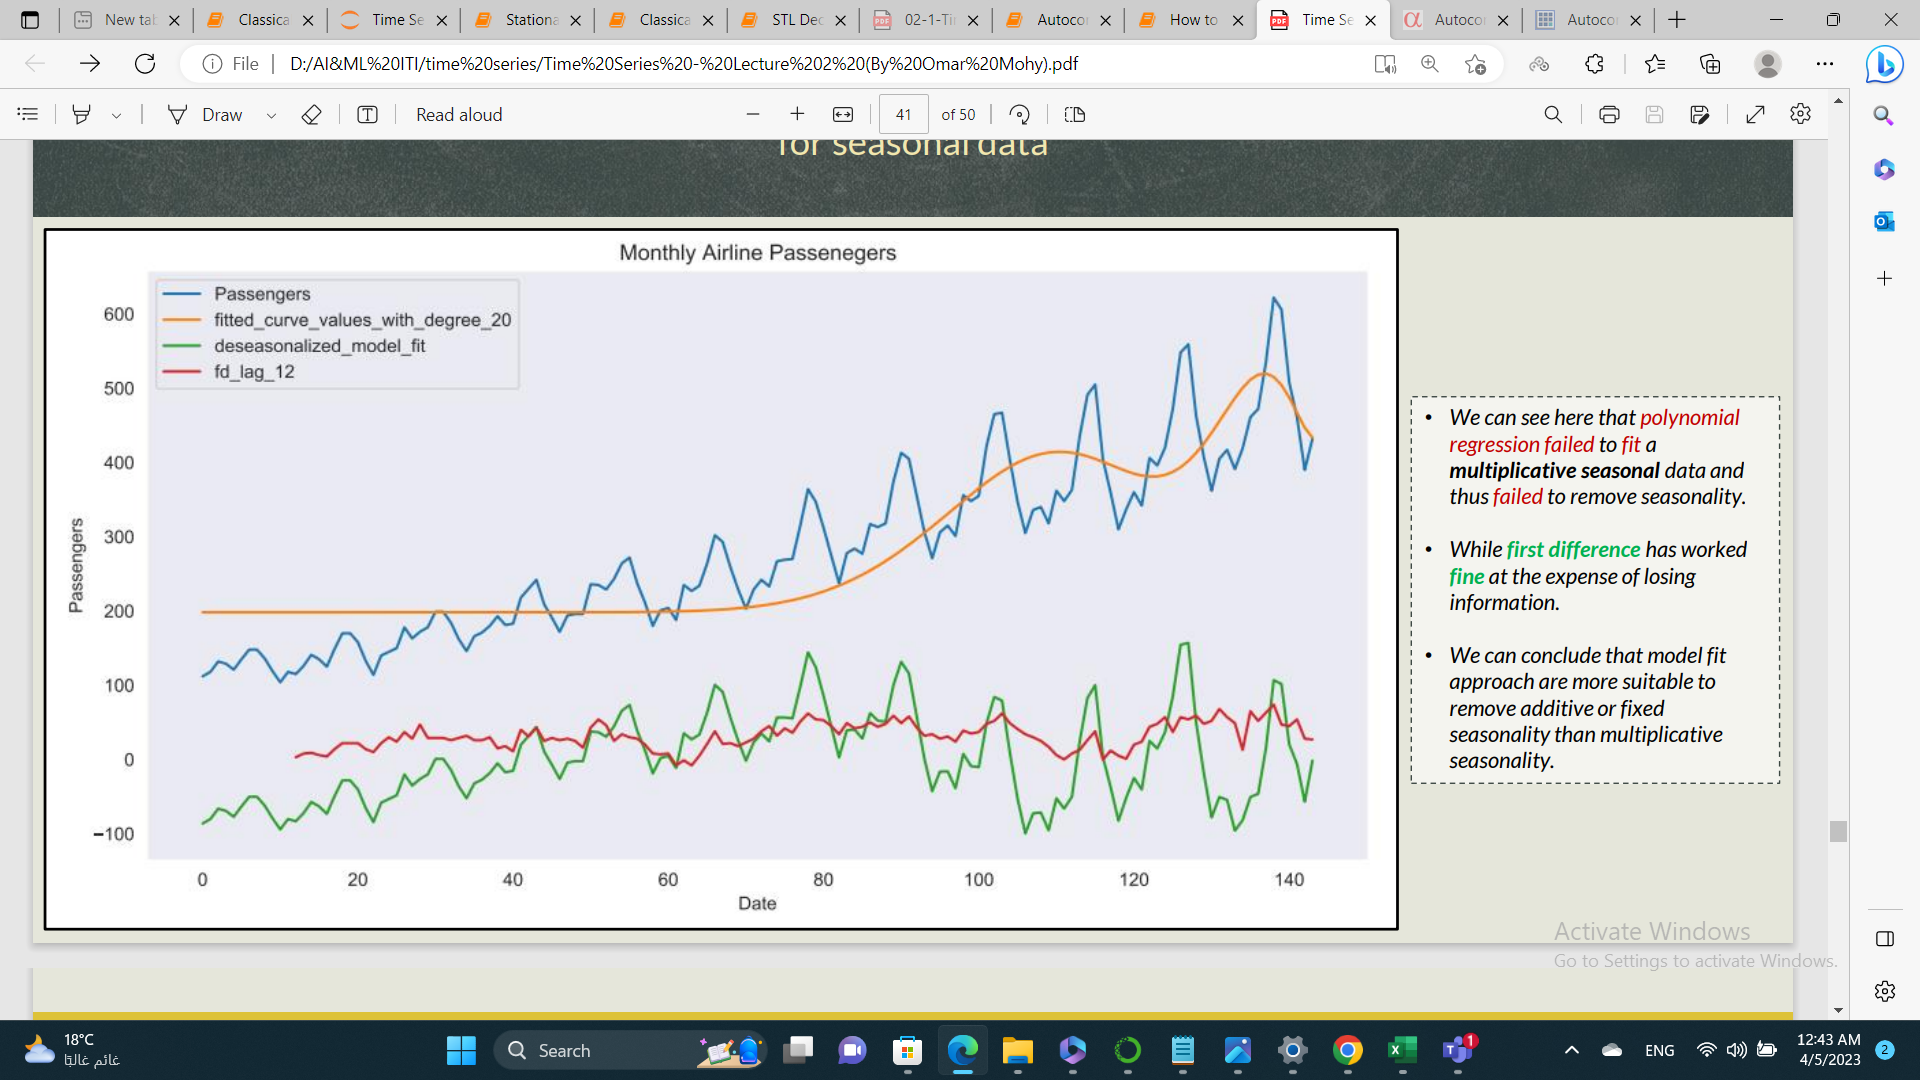


To remove seasonality from a time series, one common approach is to apply differencing. Differencing involves computing the difference between consecutive observations in the time series. If the time series exhibits seasonality, then we may need to apply seasonal differencing, which involves computing the difference between an observation and the corresponding observation from the previous season.

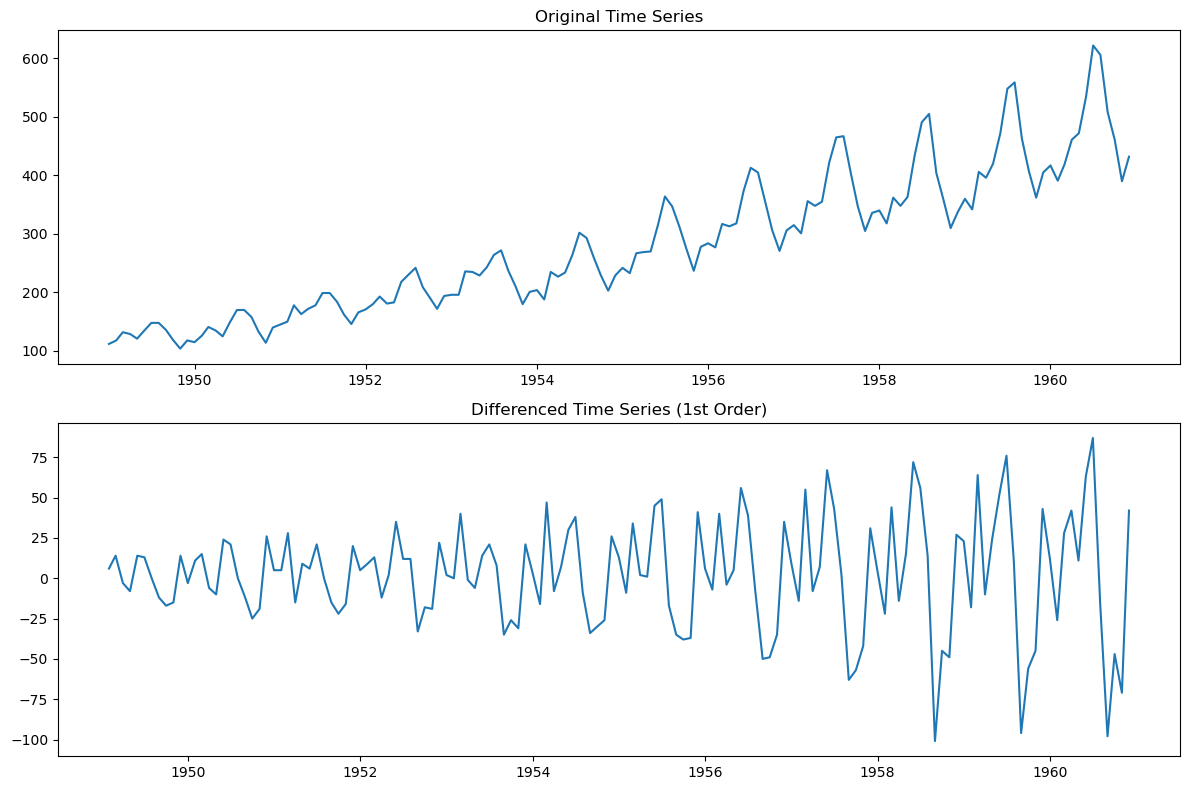

In [7]:
# Apply first-order differencing
diff = df.diff(periods=1)

# Plot the original and differenced time series
import matplotlib.pyplot as plt
fig, ax = plt.subplots(2, 1, figsize=(12, 8))
ax[0].plot(df)
ax[0].set_title('Original Time Series')
ax[1].plot(diff)
ax[1].set_title('Differenced Time Series (1st Order)')
plt.tight_layout()
plt.show()

it's nice you delete trend and seasonlity

Simple Linear Regression Model Cannot Remove Seasonality
We need a Curve Fitting Approach

C:\Users\Badr\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Badr\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


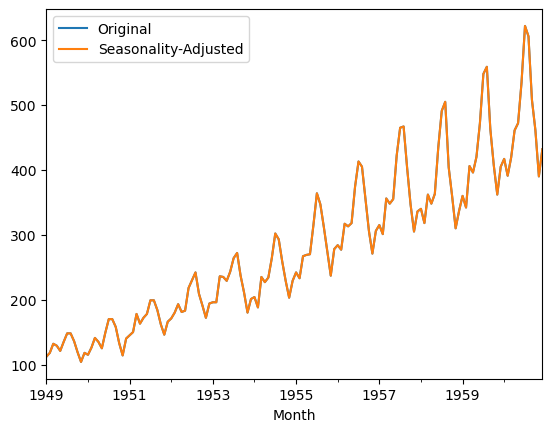

In [17]:

from statsmodels.tsa.statespace.sarimax import SARIMAX
df = pd.read_csv('AirPassengers.csv', index_col='Month', parse_dates=True)
# Fit a SARIMA model to the data
model = SARIMAX(df, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
results = model.fit()

# Use the model to remove seasonality
df['seasonality_adjusted'] = results.resid + results.fittedvalues

# Plot the original and seasonality-adjusted data
fig, ax = plt.subplots()
df['#Passengers'].plot(ax=ax, label='Original')
df['seasonality_adjusted'].plot(ax=ax, label='Seasonality-Adjusted')
ax.legend()
plt.show()


## How to Transform Time Series Data that is Stationary in Variance?

If variability of time series data doesn’t depend on time period, then best 
transformation is log transform 𝑙𝑜𝑔 𝑥 (i.e., as time increases, variance doesn’t 
always increase or decrease as figure on the left).

If variability of time series data depends on time period, then best transformation 
is square root 𝑥 or Box-Cox transform 𝑥
𝜆−1
𝜆
, 𝑤ℎ𝑒𝑟𝑒 𝜆 = 0 → 𝑙𝑜𝑔(𝑥) .
(i.e., as time increases, variance always increases or decreases as figure on the left).


Important Note: You cannot apply these transformationsto negative
values. So, if your data is not stationary in trend and in variance, you 
must make it stationary in variance first, because applying differences 
could cause time series values to be negative

Note: Models that can handle 
changes in variance and shifts in 
volatility as in financial data are 
ARCH and GARCH Models

In [18]:
# from data view it depend on time using box-cox

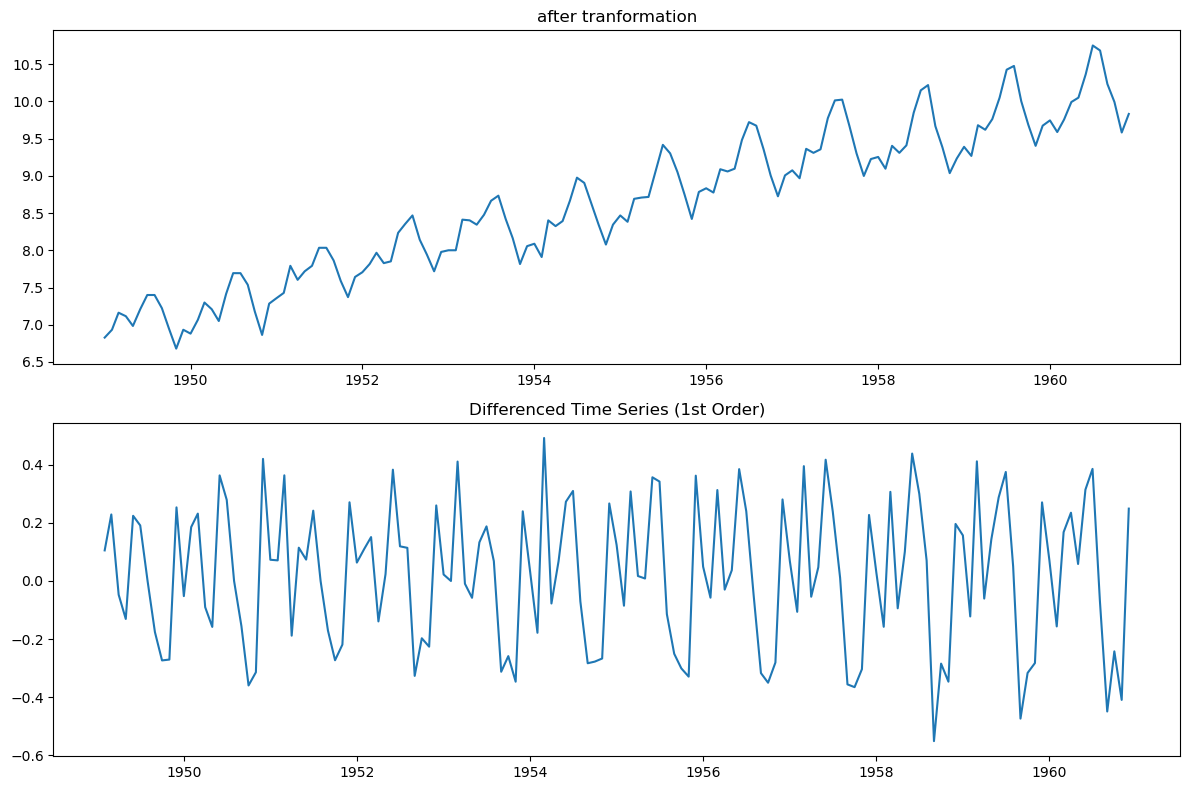

In [25]:
from scipy import stats

# Load the data
data =  pd.read_csv('AirPassengers.csv', index_col='Month', parse_dates=True)

# Apply Box-Cox transform
transformed_data, lambda_param = stats.boxcox(data['#Passengers'])
data['#Passengers'] = transformed_data
# Apply first-order differencing
diff = data.diff(periods=1)
# Plot the original and differenced time series
import matplotlib.pyplot as plt
fig, ax = plt.subplots(2, 1, figsize=(12, 8))
ax[0].plot(data)
ax[0].set_title('after tranformation')
ax[1].plot(diff)
ax[1].set_title('Differenced Time Series (1st Order)')
plt.tight_layout()
plt.show()

In [28]:
data = diff

In [33]:
data =data.dropna()

Now Data is Stationary

## check to confirm

In [34]:
import statsmodels.api as sm
result = sm.tsa.stattools.adfuller(data['#Passengers'])

# Print the test statistic and p-value
print('ADF Test Statistic:', result[0])
print('p-value:', result[1])

# Check if the p-value is less than the significance level (e.g., 0.05) to reject the null hypothesis of non-stationarity
if result[1] < 0.05:
    print('The time series is stationary.')
else:
    print('The time series is non-stationary.')

ADF Test Statistic: -2.8717075283173914
p-value: 0.04873833392661849
The time series is stationary.
